In [1]:
import pandas as pd
import numpy as np

In [2]:
play = pd.read_csv("googleplaystore.csv")
review = pd.read_csv("googleplaystore_user_reviews.csv")

In [3]:
play

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
review

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [5]:
play.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
play.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
play[play["Reviews"].str.isdigit()==False]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [8]:
def clean_reviews(x):
    if(x.isdigit()):
        return int(x)
    else:
        return float(x[:-1]) * 1000000

In [9]:
play["Reviews_"] = play["Reviews"].apply(clean_reviews)

In [10]:
play["Size"]

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10841, dtype: object

In [11]:
def clean_size(x):
    if x.isdigit():
        return float(x)
    elif(x[-1]=="M"):
        return float(x[:-1]) * 1e06
    elif(x[-1]=="k"):
        return float(x[:-1]) * 1e03
    else:
        return np.nan
    

In [12]:
play["Size_"] = play["Size"].apply(clean_size)

In [13]:
play["Price"].value_counts()

0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$1.75         1
$14.00        1
$4.85         1
$46.99        1
$1.04         1
Name: Price, Length: 93, dtype: int64

In [14]:
def clean_price(x):
    if x[0]=="$":
        return float(x[1:])
    else:
        return 0

In [15]:
play["Price_"] = play["Price"].apply(lambda x: float(x[1:]) if x[0]=='$' else 0)

In [16]:
play["Price_"].value_counts()

0.00     10041
0.99       148
2.99       129
1.99        73
4.99        72
         ...  
19.90        1
1.75         1
14.00        1
4.85         1
1.04         1
Name: Price_, Length: 92, dtype: int64

In [17]:
play["Genres"]

0                     Art & Design
1        Art & Design;Pretend Play
2                     Art & Design
3                     Art & Design
4          Art & Design;Creativity
                   ...            
10836                    Education
10837                    Education
10838                      Medical
10839            Books & Reference
10840                    Lifestyle
Name: Genres, Length: 10841, dtype: object

In [18]:
play["Genre1"] = play["Genres"].apply(lambda x:x.split(";")[0])

In [19]:
play["Genre2"] = play["Genres"].apply(lambda x:x.split(";")[1] if ";" in x else x)

In [20]:
def clean_lastupdated(x):
    if x=="1.0.19":
        return np.nan
    else:
        return pd.to_datetime(x)

In [21]:
play["Last Updated_"]= play["Last Updated"].apply(clean_lastupdated)

In [22]:
play

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_,Size_,Price_,Genre1,Genre2,Last Updated_
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,159.0,19000000.0,0.0,Art & Design,Art & Design,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,967.0,14000000.0,0.0,Art & Design,Pretend Play,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,87510.0,8700000.0,0.0,Art & Design,Art & Design,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,215644.0,25000000.0,0.0,Art & Design,Art & Design,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,967.0,2800000.0,0.0,Art & Design,Creativity,2018-06-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,38.0,53000000.0,0.0,Education,Education,2017-07-25
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,4.0,3600000.0,0.0,Education,Education,2018-07-06
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,3.0,9500000.0,0.0,Medical,Medical,2017-01-20
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,114.0,NaN,0.0,Books & Reference,Books & Reference,2015-01-19


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

[]

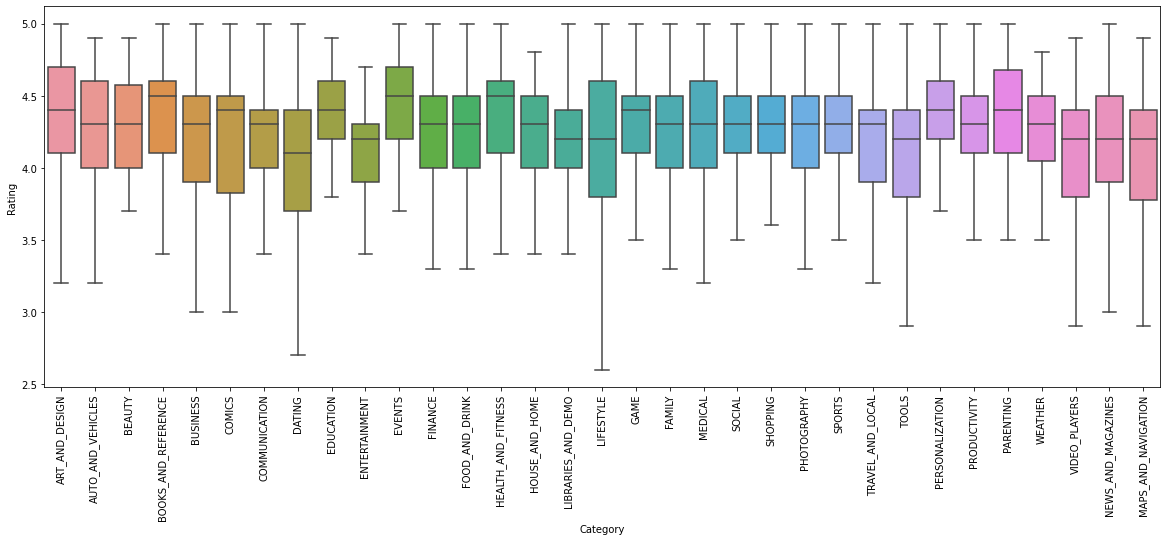

In [24]:
plt.figure(figsize=[20,7])

clear = play[play['Category']!='1.9']

sns.boxplot(data = clear, x ='Category', y='Rating', showfliers=False)
plt.xticks(rotation = 90)
plt.plot()

[]

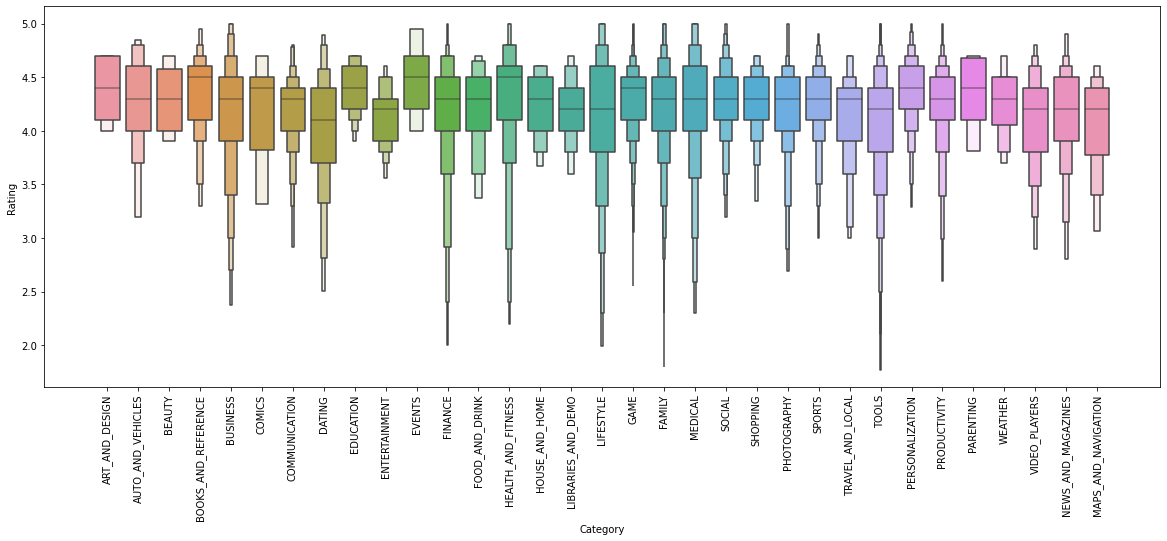

In [25]:
plt.figure(figsize=[20,7])
clear = play[play['Category']!='1.9']
sns.boxenplot(data = clear, x ='Category', y='Rating', showfliers=False)
plt.xticks(rotation = 90)
plt.plot()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

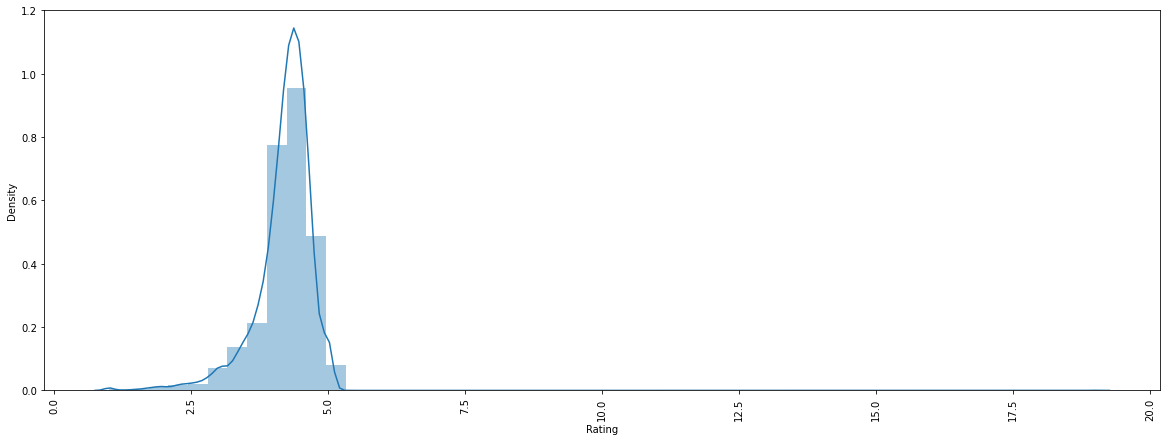

In [26]:
plt.figure(figsize=[20,7])
sns.distplot(play['Rating'])
plt.xticks(rotation = 90)
plt.plot()

[]

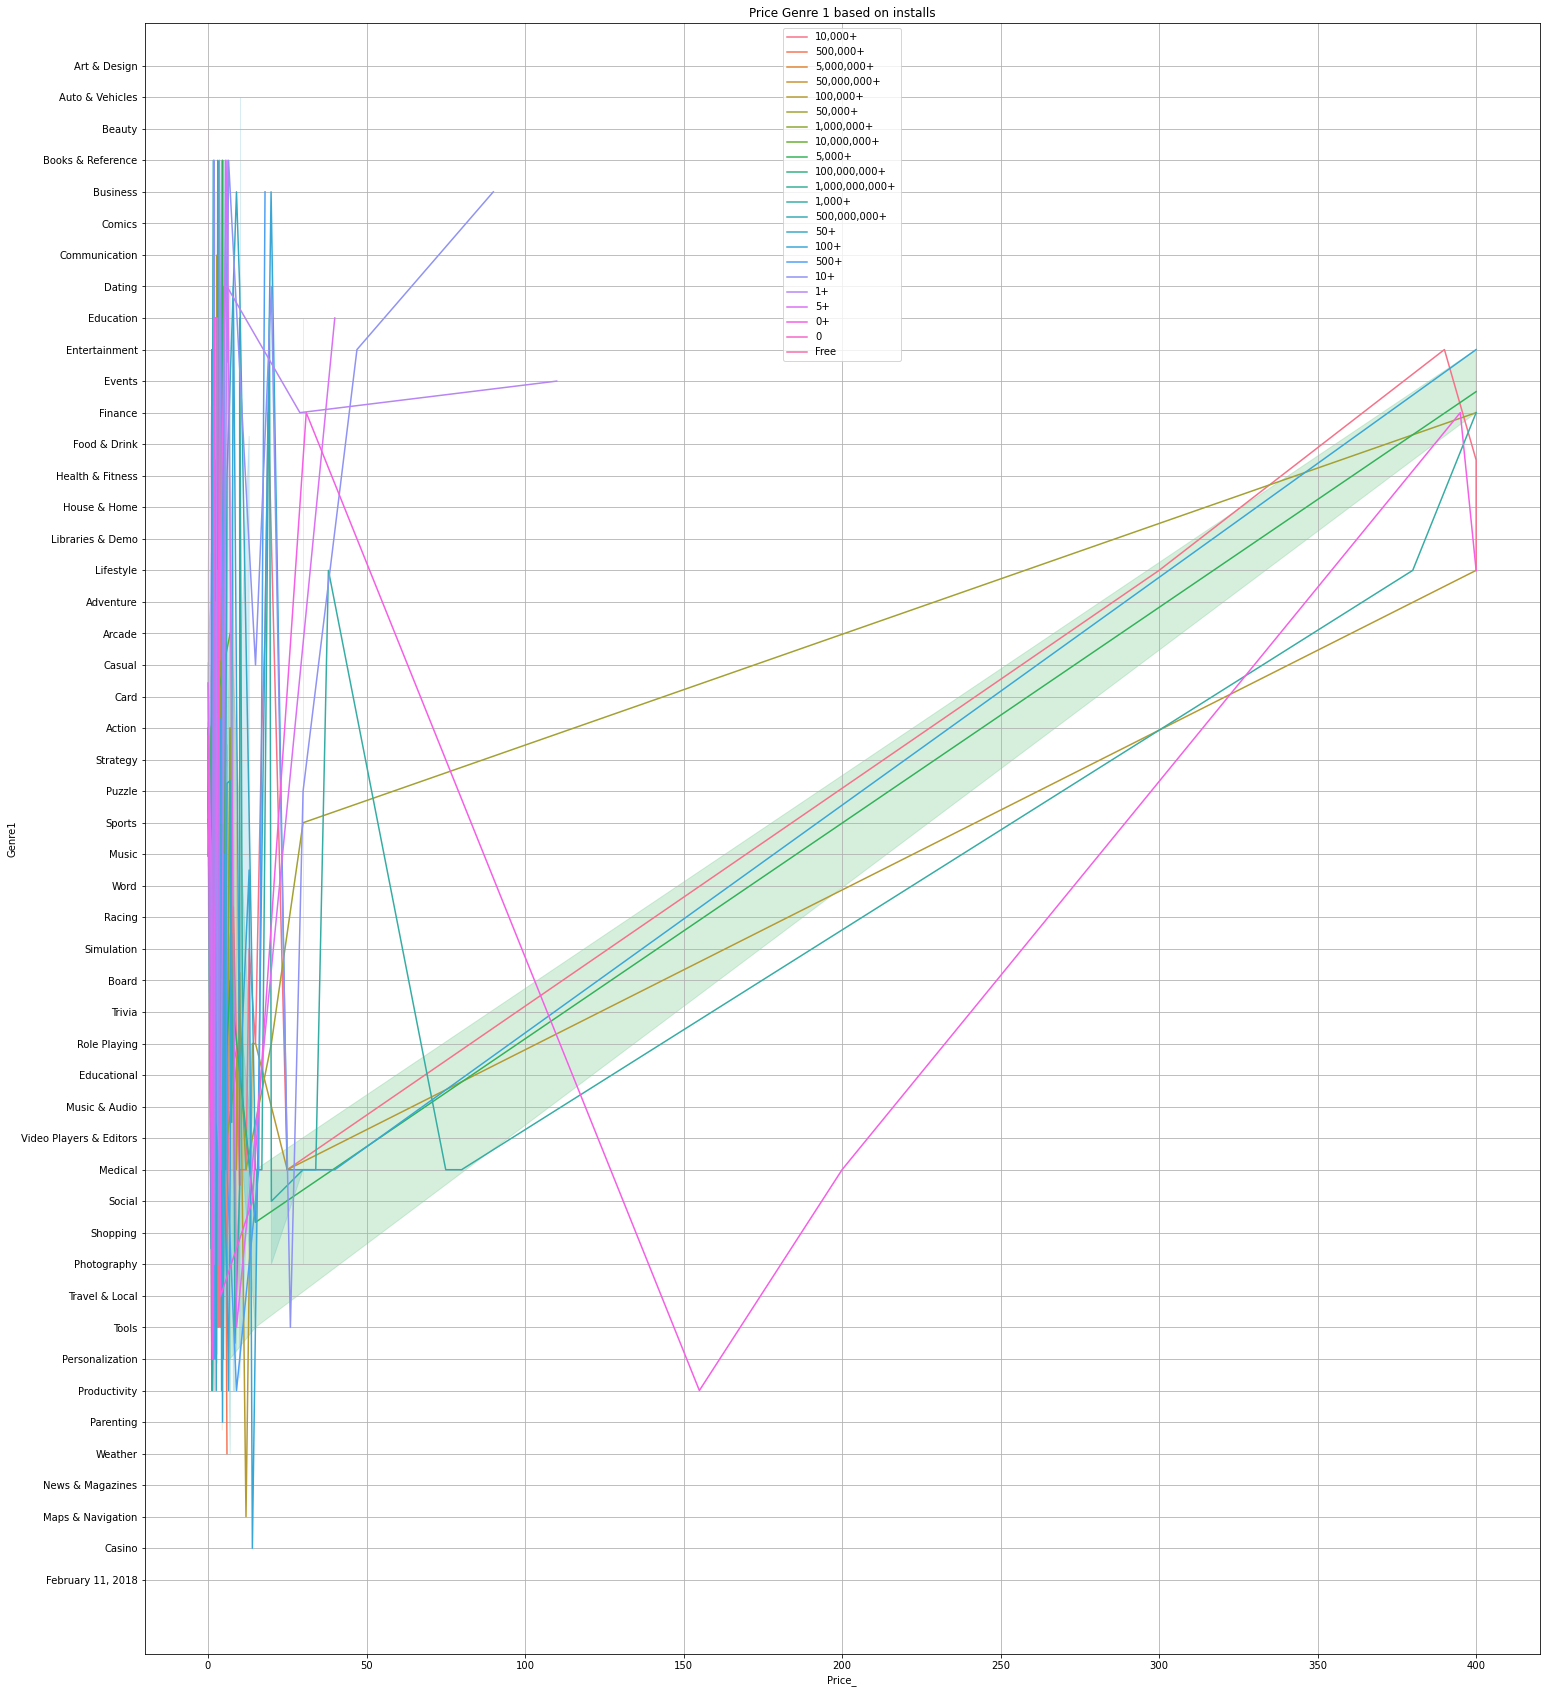

In [27]:
plt.figure(figsize=[25,30])
sns.lineplot(data = play, x= 'Price_' , y='Genre1', hue='Installs')
plt.legend(loc='upper center')
plt.title('Price Genre 1 based on installs')
plt.grid()
plt.plot()

[]

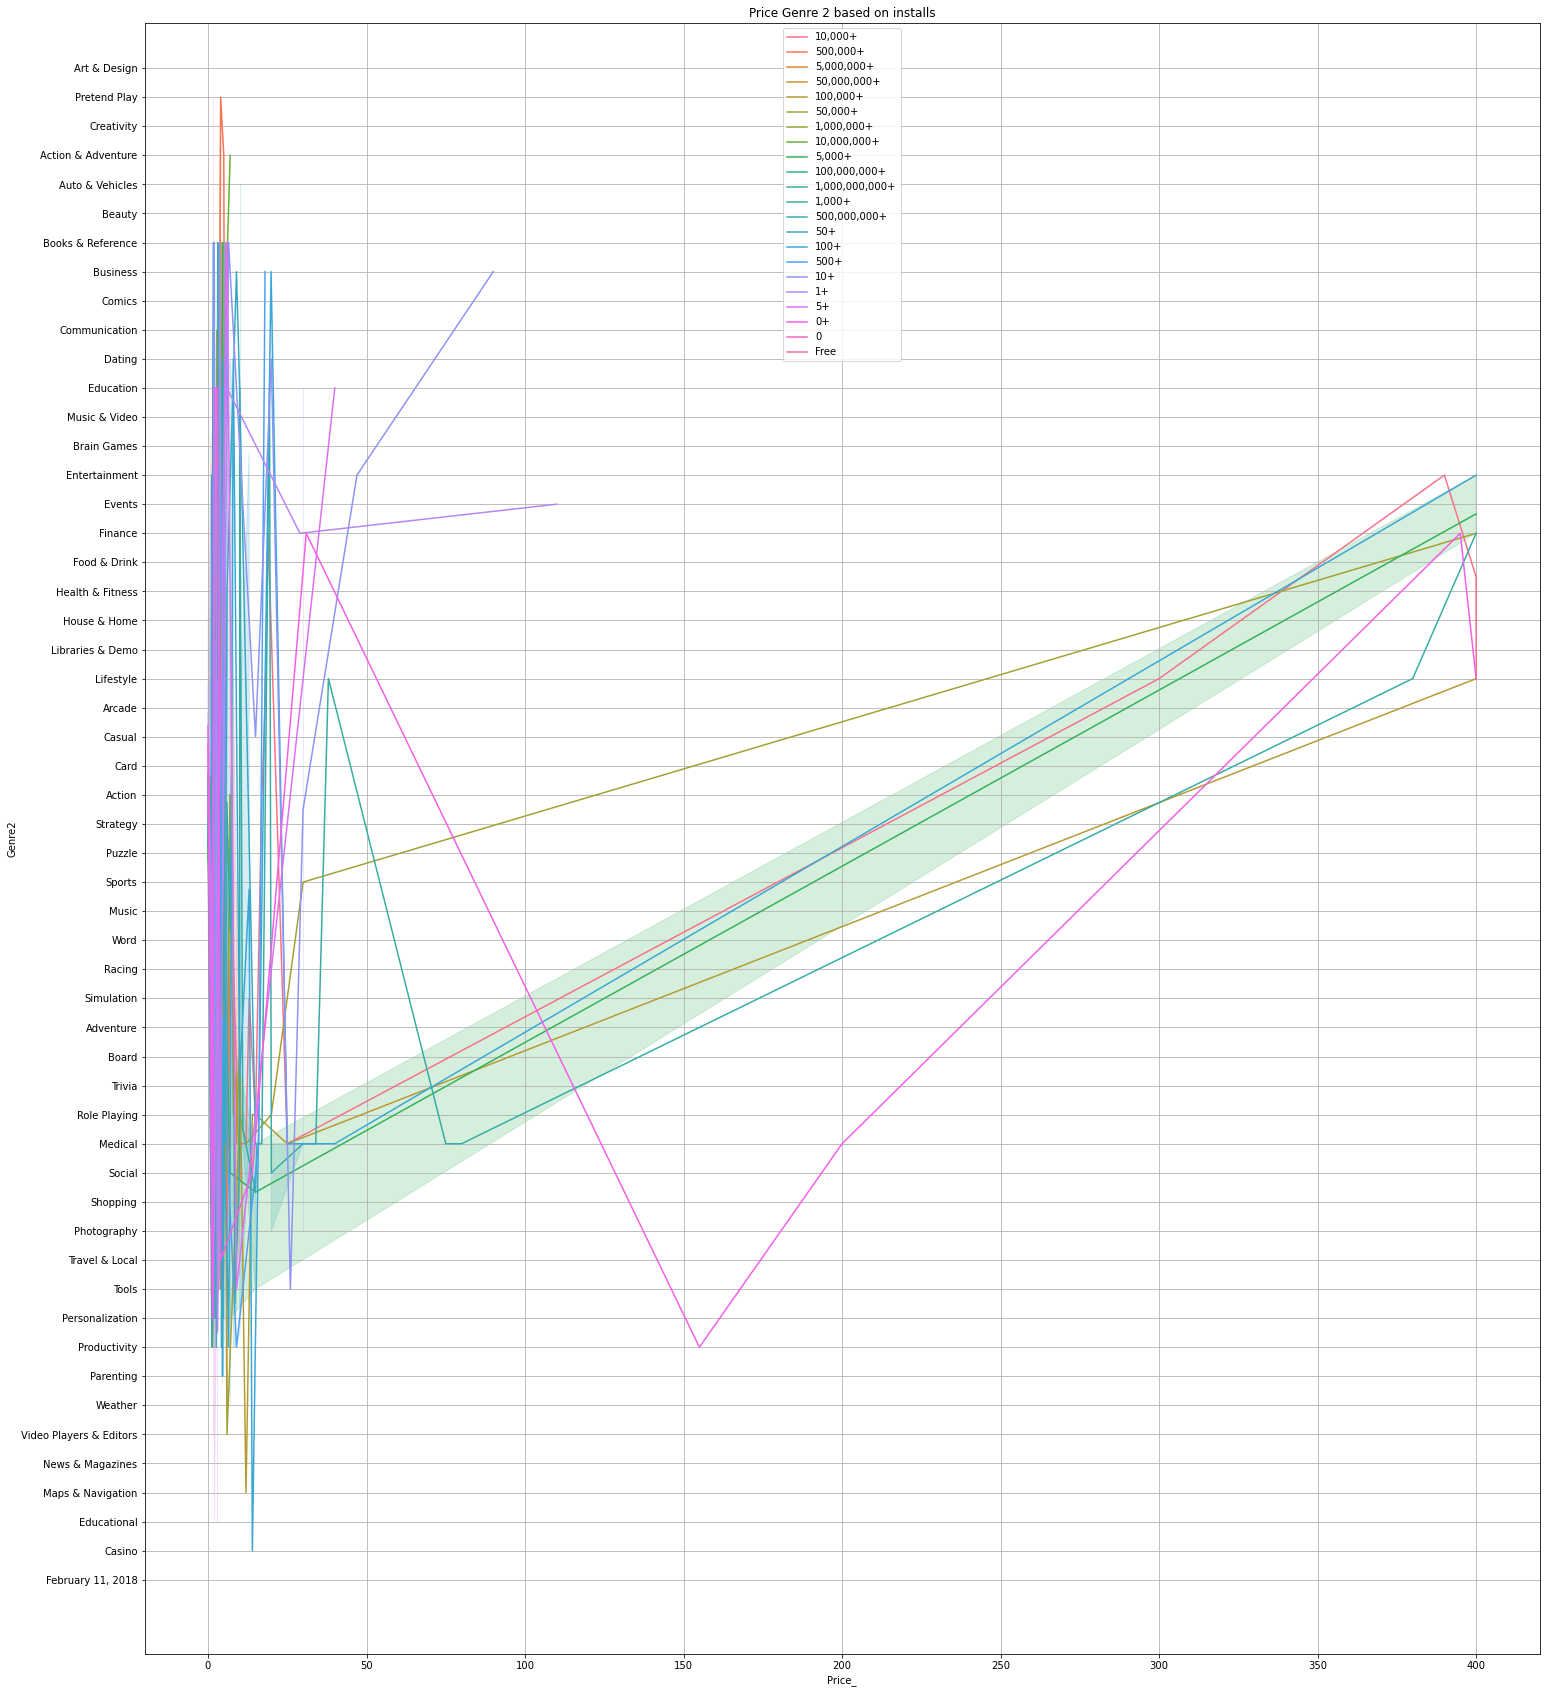

In [28]:
plt.figure(figsize=[25,30])
sns.lineplot(data = play, x= 'Price_' , y='Genre2', hue='Installs')
plt.legend(loc='upper center')
plt.title('Price Genre 2 based on installs')
plt.grid()
plt.plot()

[]

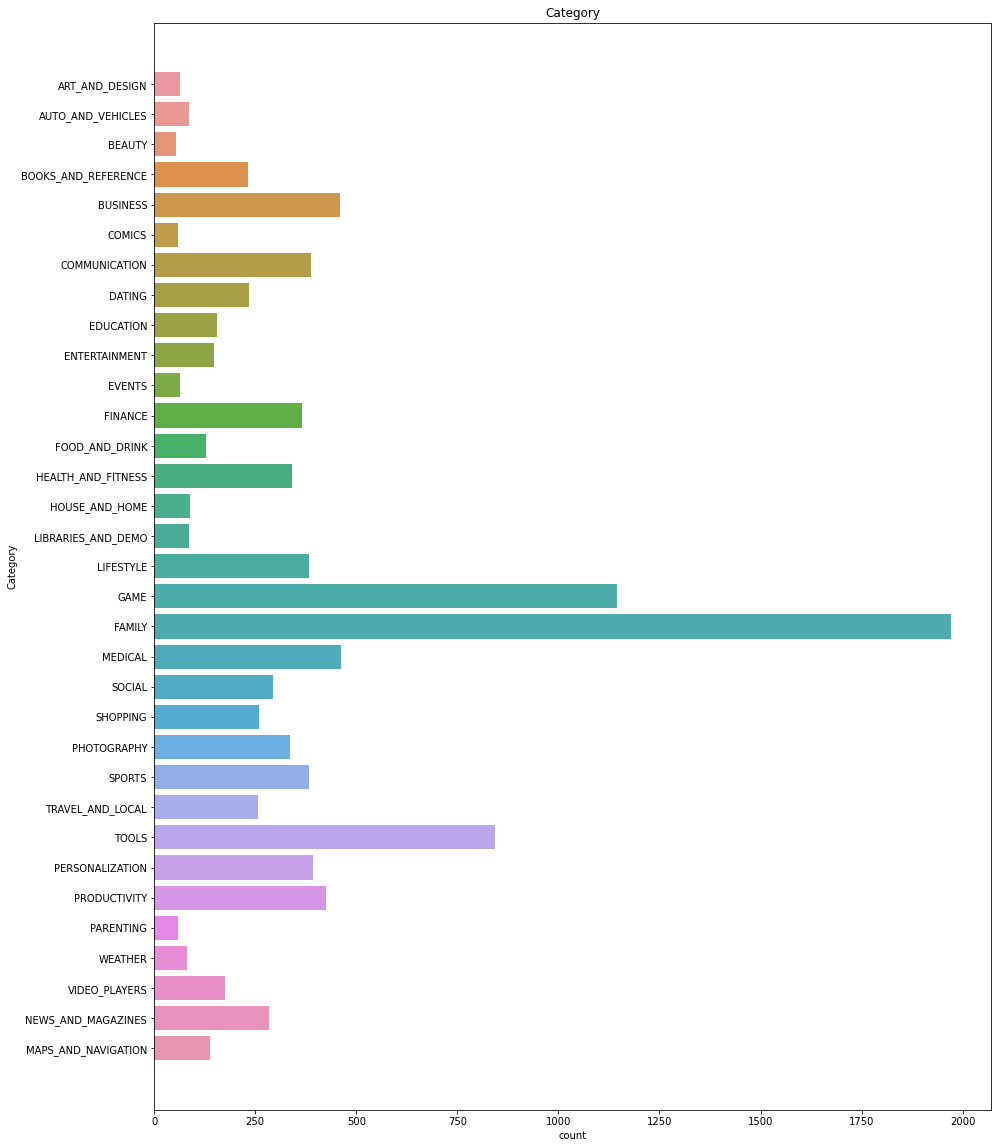

In [29]:
plt.figure(figsize=[15,20])
clear = play[play['Category'] != '1.9']
sns.countplot(y=clear['Category'])
plt.title('Category')
plt.plot()

In [30]:
play.Genres.isna().value_counts()

False    10841
Name: Genres, dtype: int64

In [31]:
play.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Reviews_', 'Size_', 'Price_', 'Genre1', 'Genre2',
       'Last Updated_'],
      dtype='object')

[]

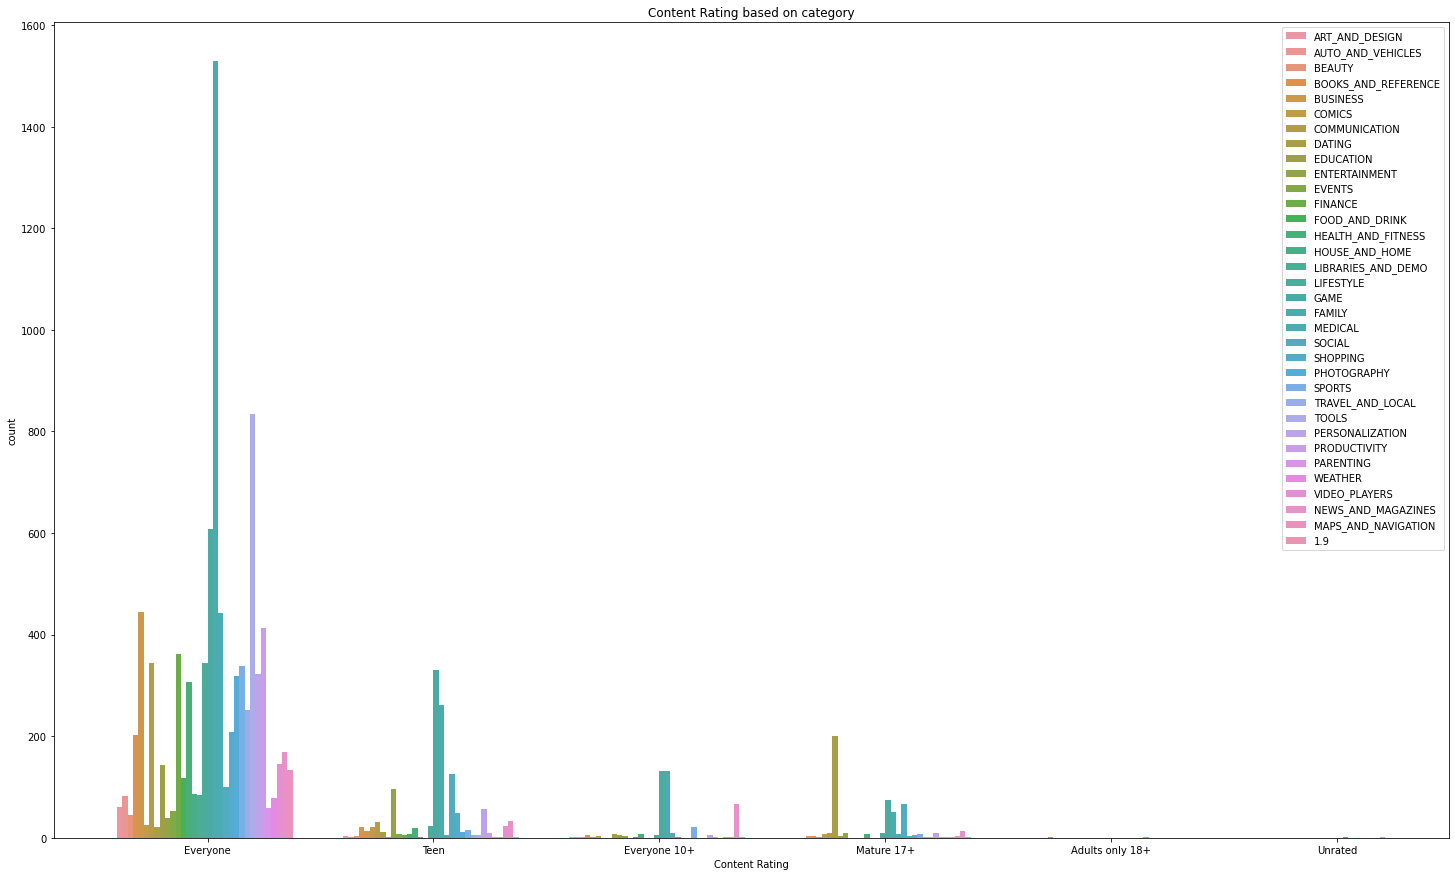

In [32]:
plt.figure(figsize=[25,15])
sns.countplot(data = play,x = 'Content Rating',hue='Category')
plt.title('Content Rating based on category')
plt.legend(loc='upper right')
plt.plot()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

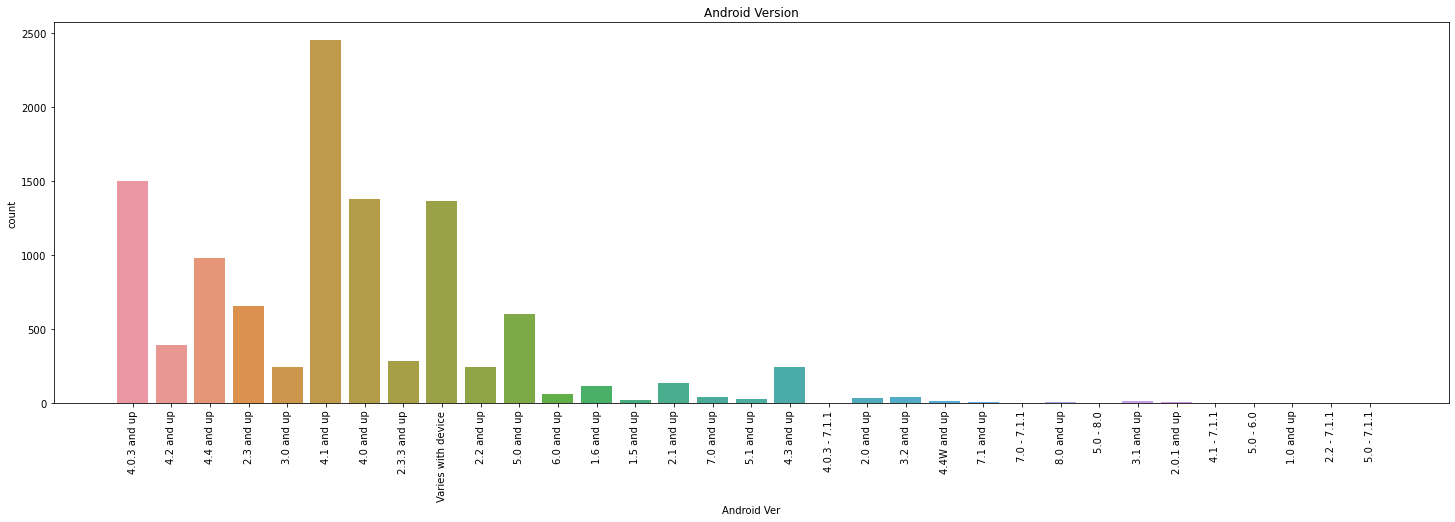

In [33]:
plt.figure(figsize=[25,7])
sns.countplot(play['Android Ver'])
plt.title('Android Version')
plt.xticks(rotation=90)
plt.plot()

[]

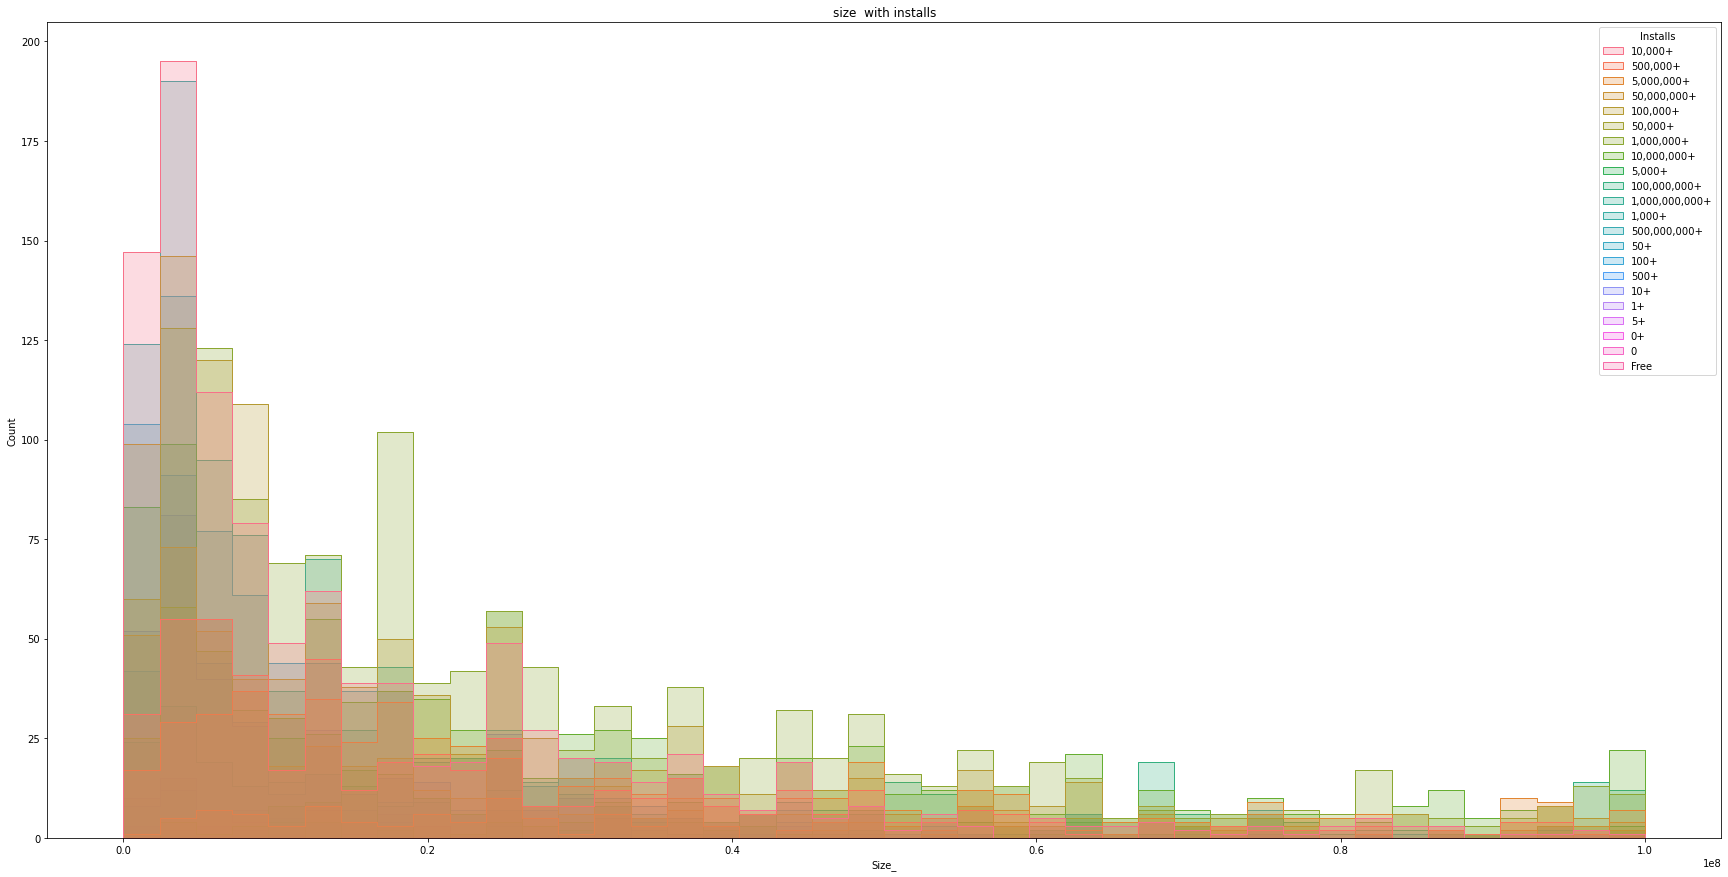

In [34]:
plt.figure(figsize=[30,15])


sns.histplot(play, x= "Size_", hue='Installs', element='step')
plt.title('size  with installs')
# plt.ylabel('Exponent')
plt.plot()

In [35]:
play[play['Type'] != 'Free']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_,Size_,Price_,Genre1,Genre2,Last Updated_
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up,11442.0,6800000.0,4.99,Business,Business,2018-03-25
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up,10295.0,39000000.0,4.99,Business,Business,2017-04-11
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up,11442.0,6800000.0,4.99,Business,Business,2018-03-25
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up,10295.0,39000000.0,4.99,Business,Business,2017-04-11
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,$3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up,18247.0,NaN,3.99,Communication,Communication,2018-07-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,FAMILY,NaN,17,157k,100+,Paid,$0.99,Mature 17+,Entertainment,"November 25, 2015",1.2,2.1 and up,17.0,157000.0,0.99,Entertainment,Entertainment,2015-11-25
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4M,"1,000+",Paid,$7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up,35.0,2400000.0,7.99,Health & Fitness,Health & Fitness,2018-08-08
10782,Trine 2: Complete Story,GAME,3.8,252,11M,"10,000+",Paid,$16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up,252.0,11000000.0,16.99,Action,Action,2015-02-27
10785,"sugar, sugar",FAMILY,4.2,1405,9.5M,"10,000+",Paid,$1.20,Everyone,Puzzle,"June 5, 2018",2.7,2.3 and up,1405.0,9500000.0,1.20,Puzzle,Puzzle,2018-06-05


In [36]:
play['Genre1']

0             Art & Design
1             Art & Design
2             Art & Design
3             Art & Design
4             Art & Design
               ...        
10836            Education
10837            Education
10838              Medical
10839    Books & Reference
10840            Lifestyle
Name: Genre1, Length: 10841, dtype: object

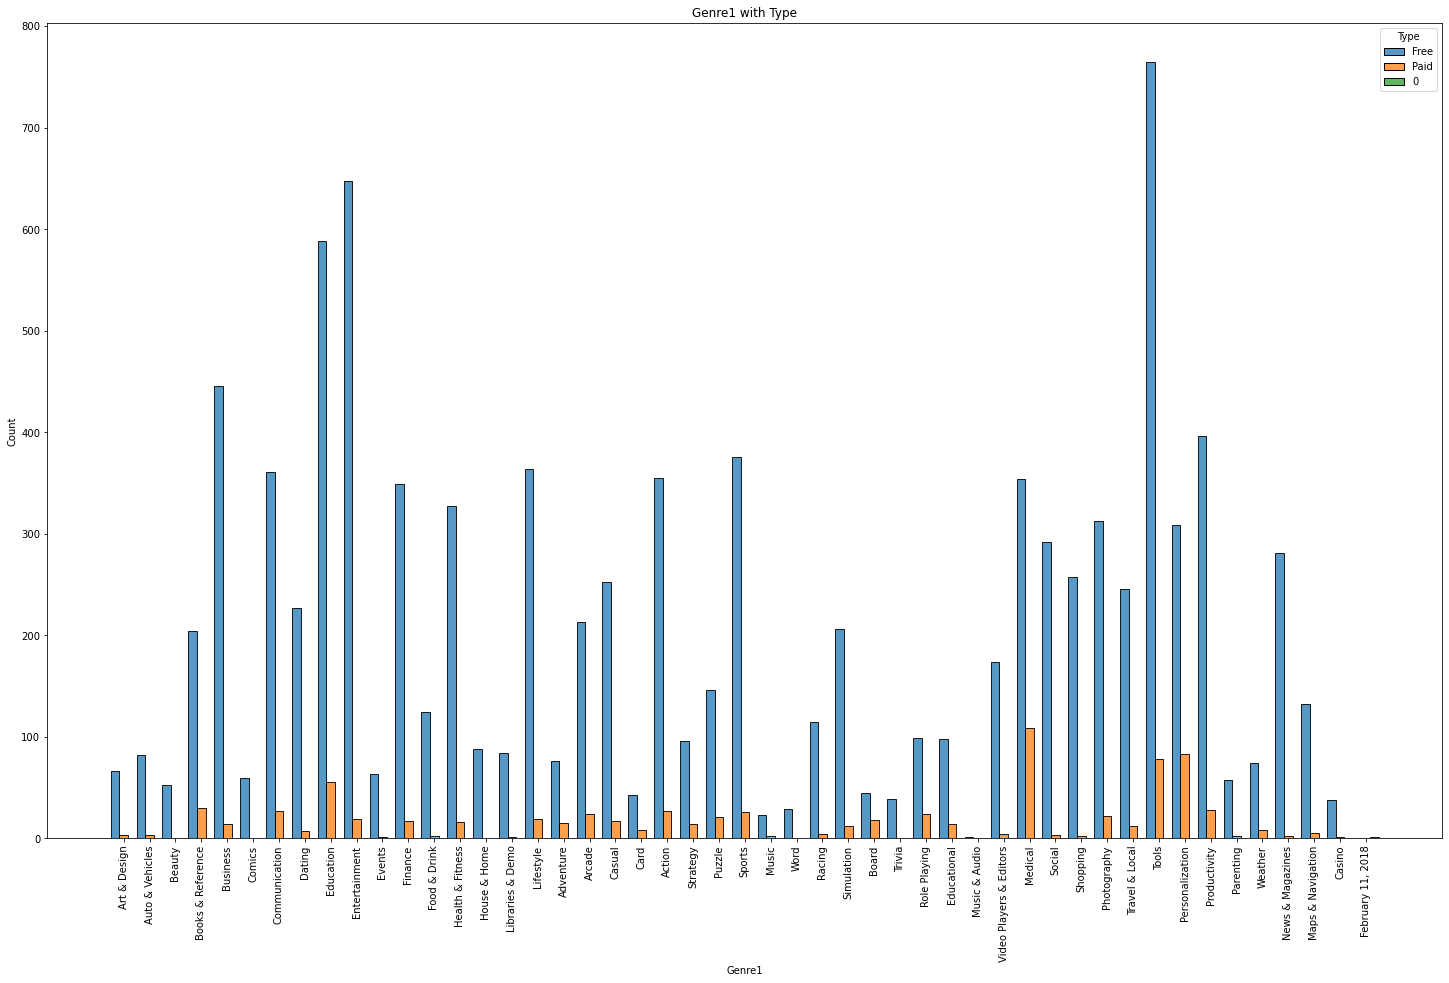

In [37]:
plt.figure(figsize=[25,15])

clear = play[play['Genre1']!='February 11,2018']

sns.histplot(clear, x = 'Genre1', hue = 'Type', multiple = 'dodge')
plt.xticks(rotation=90)
plt.title('Genre1 with Type')
plt.show()

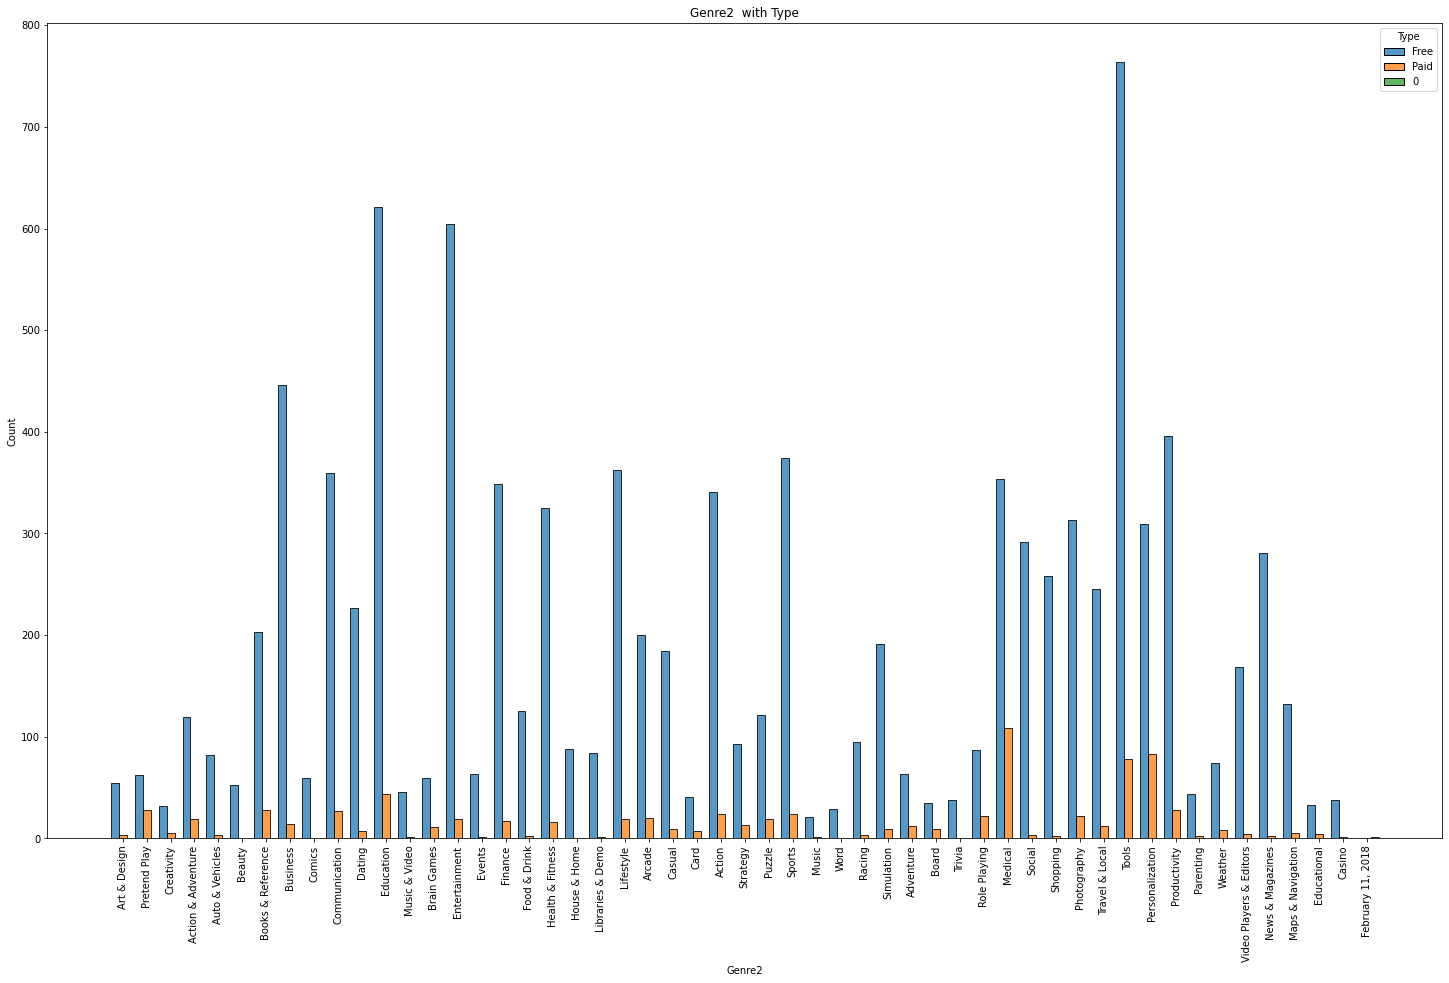

In [38]:
plt.figure(figsize=[25,15])
sns.histplot(play, x = 'Genre2', hue = 'Type', multiple = 'dodge')
plt.xticks(rotation=90)
plt.title('Genre2  with Type')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]

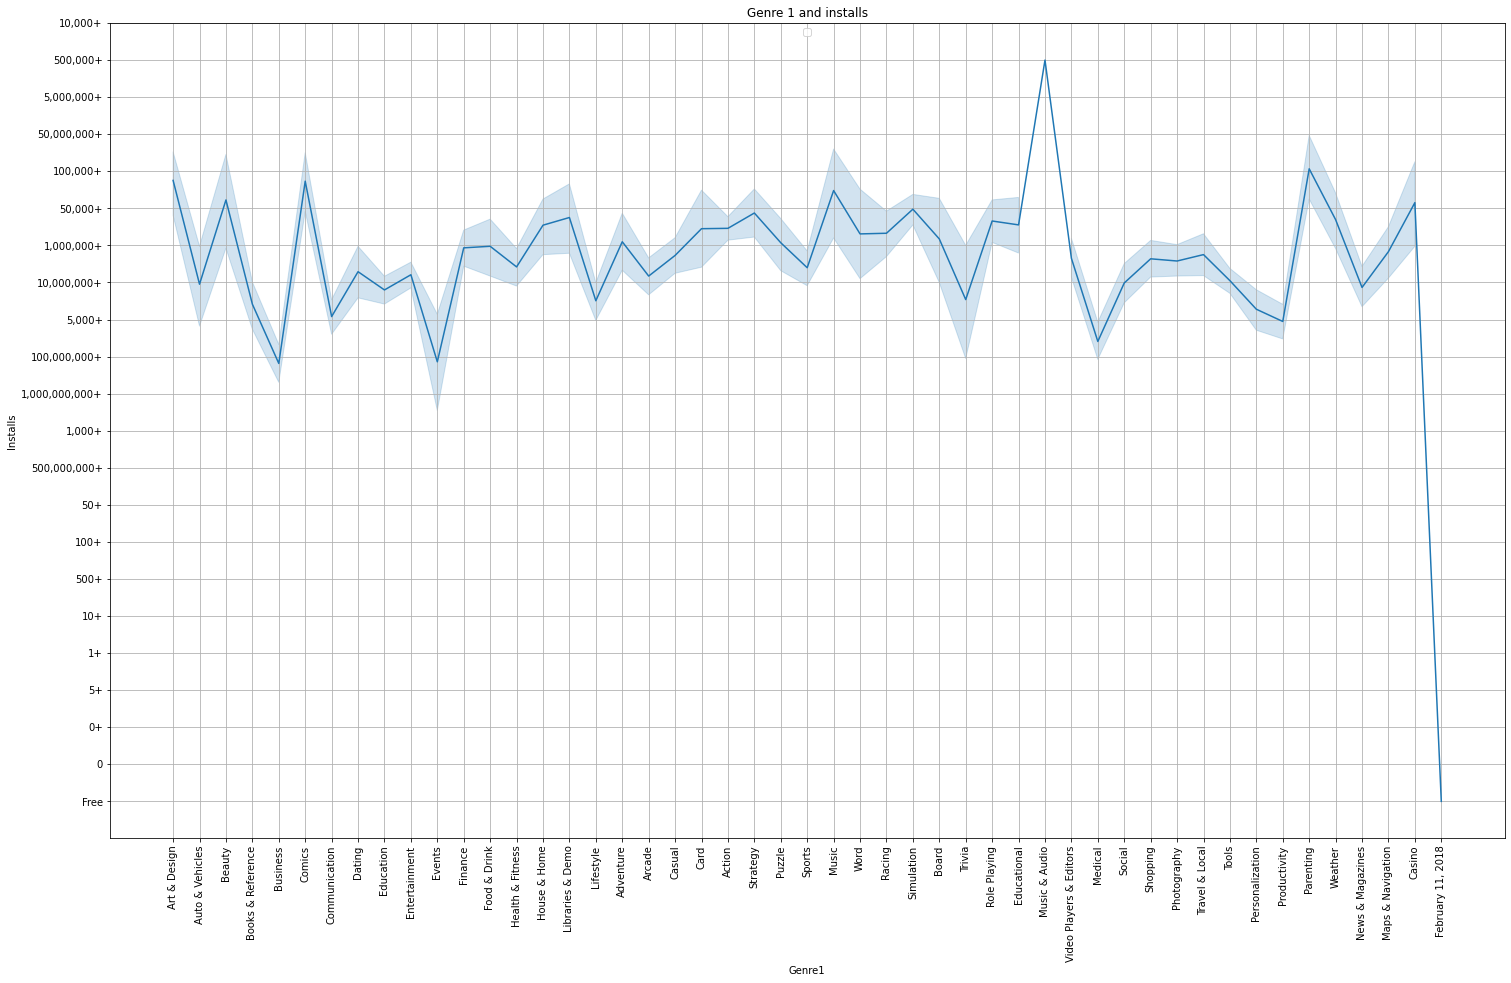

In [39]:
plt.figure(figsize=[25,15])
sns.lineplot(x= play['Genre1'] ,y = play['Installs'])
plt.legend(loc='upper center')
plt.title('Genre 1 and installs')
plt.xticks(rotation =90)
plt.grid()
plt.plot()

[]

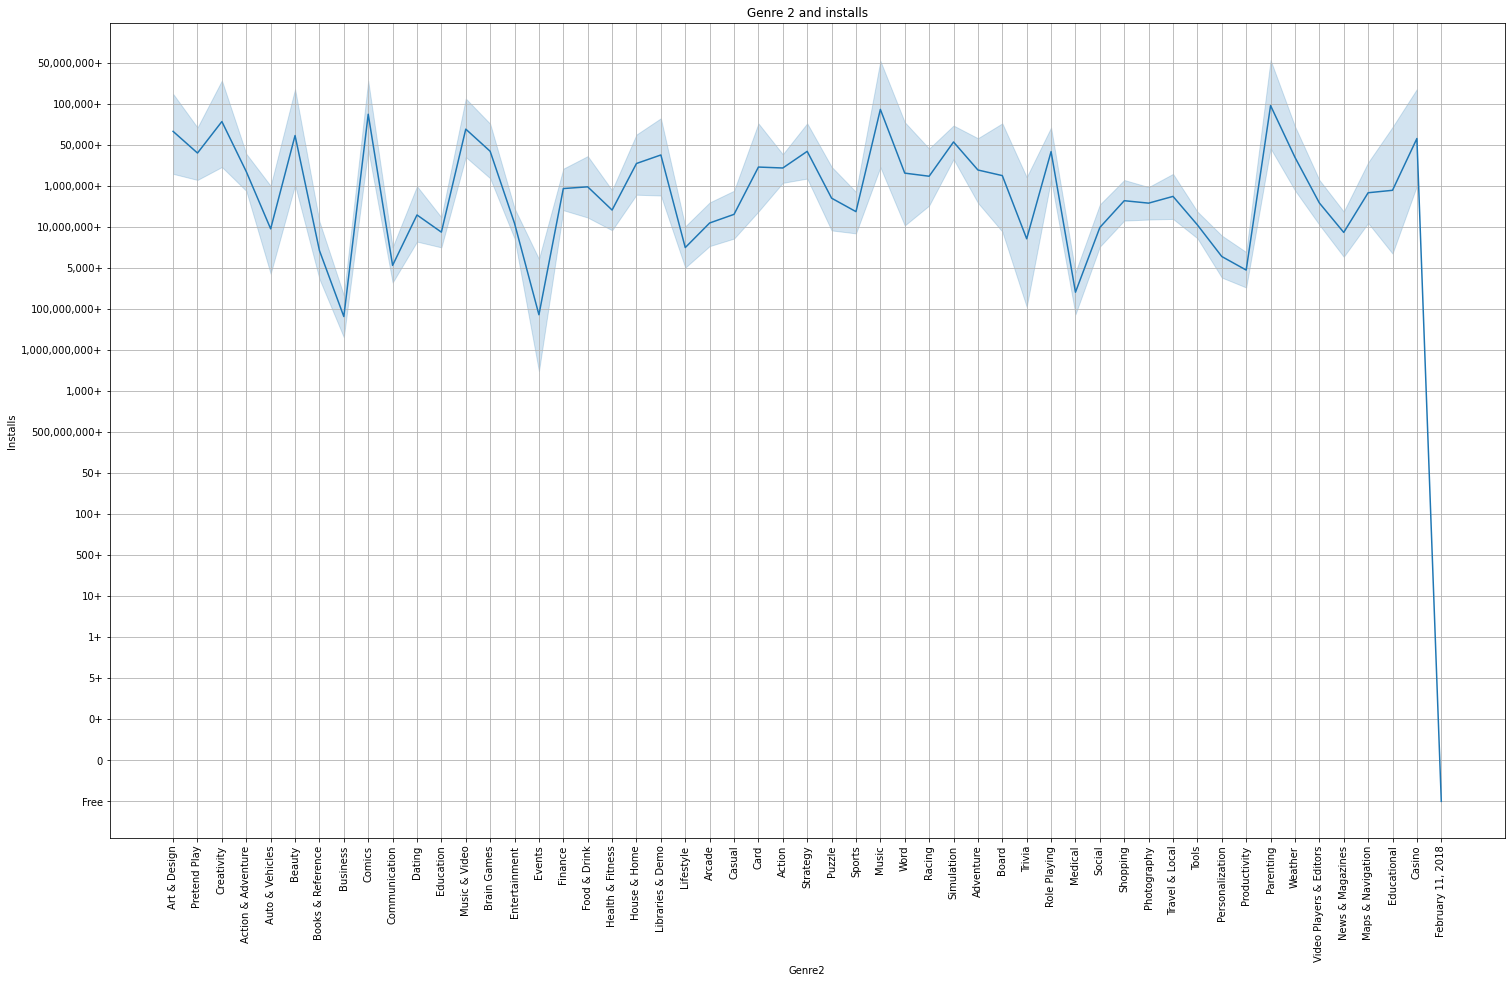

In [40]:
plt.figure(figsize=[25,15])
sns.lineplot(x= play['Genre2'] ,y = play['Installs'])
# plt.legend(loc='upper center')
plt.title('Genre 2 and installs')
plt.xticks(rotation =90)
plt.grid()
plt.plot()

[]

<Figure size 18000x504 with 0 Axes>

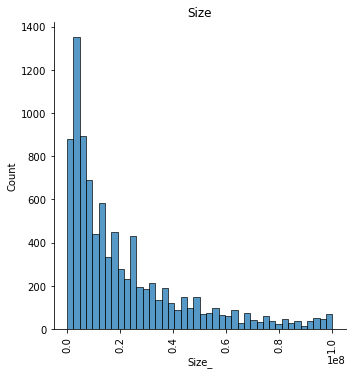

In [41]:
plt.figure(figsize=[250,7])
sns.displot(x= play['Size_'].dropna())
# plt.legend(loc='upper center')
plt.title('Size')
plt.xticks(rotation =90)
plt.plot()

<AxesSubplot:>

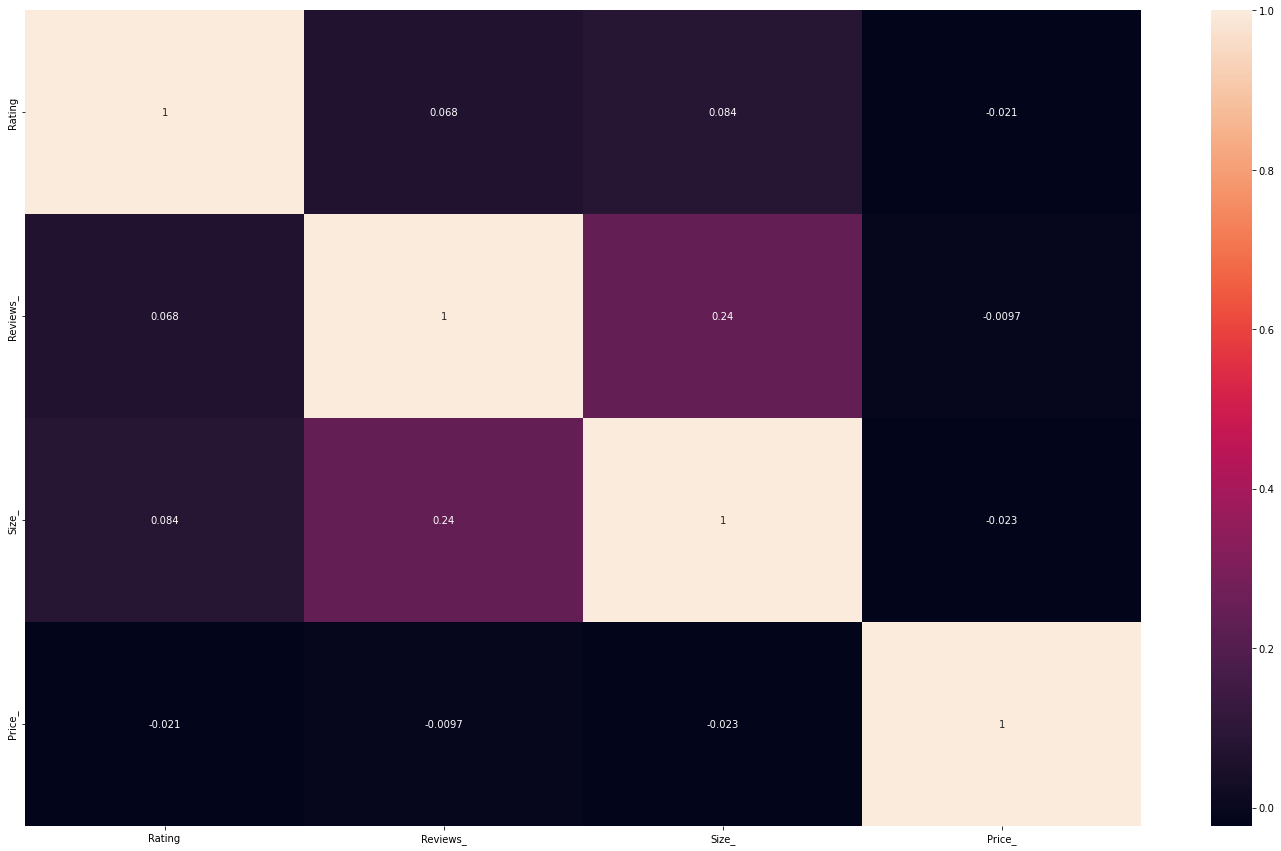

In [42]:
plt.figure(figsize=[25,15])
sns.heatmap(play.corr(), annot=True)

In [43]:
review

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [44]:
review.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [45]:
review[['Sentiment','App']].value_counts()

Sentiment  App                                       
Positive   Helix Jump                                    209
           Duolingo: Learn Languages Free                200
           Calorie Counter - Macros                      174
           Bowmasters                                    169
           Calorie Counter - MyFitnessPal                169
                                                        ... 
Negative   CALCU™ Stylish Calculator Free                  1
Neutral    Angry Birds Rio                                 1
           Anime Avatar Creator: Make Your Own Avatar      1
Negative   Burner - Free Phone Number                      1
           CDL Practice Test 2018 Edition                  1
Length: 2376, dtype: int64

In [46]:
review['Sentiment'] = review['Sentiment'].fillna('Neutral')
review["Sentiment"].value_counts()

Neutral     32026
Positive    23998
Negative     8271
Name: Sentiment, dtype: int64

In [47]:
review['Sentiment'].isna().sum()

0

[]

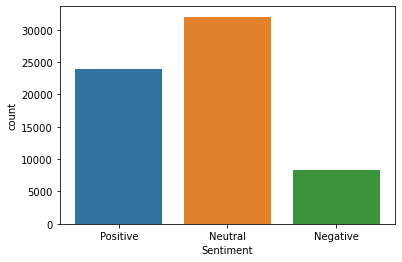

In [48]:
sns.countplot(x= review['Sentiment'])
plt.plot()

In [49]:
review['Sentiment_Polarity'].value_counts()

 0.000000    5163
 0.500000    1524
 0.700000     991
 1.000000     959
 0.800000     639
             ... 
-0.072024       1
 0.452000       1
 0.076190       1
-0.067256       1
 0.173333       1
Name: Sentiment_Polarity, Length: 5410, dtype: int64

In [50]:
review[review['Sentiment_Polarity']>0]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64217,Housing-Real Estate & Property,"I able set range 1cr, scroll space 0-1cr range...",Positive,0.233333,0.550000
64221,Housing-Real Estate & Property,Everything old stuff neither clear sold proper...,Positive,0.021591,0.259470
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222


<AxesSubplot:xlabel='Sentiment_Polarity', ylabel='count'>

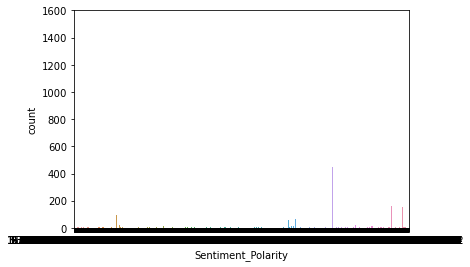

In [51]:
sns.countplot(x = review[review['Sentiment_Polarity']>0]['Sentiment_Polarity'])